In [1]:
import pandas as pd
import seaborn as sns

In [2]:
hostels = pd.read_csv('../data/hostel.csv')
penguins = sns.load_dataset("penguins")

### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

It's very common for animals to have a 50/50 ratio in sex, so wheter you compare it by island or species it shouldn't really matter all that much.

In [3]:
contingencyTable = penguins.groupby(['species','sex']).size().unstack('species', fill_value=0)
contingencyTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


In [4]:
contingencyTable = penguins.groupby(['island','sex']).size().unstack('island', fill_value=0)
contingencyTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


Looking at the results above what I said seems to be accurate for these penguins as well.

<AxesSubplot:xlabel='sex'>

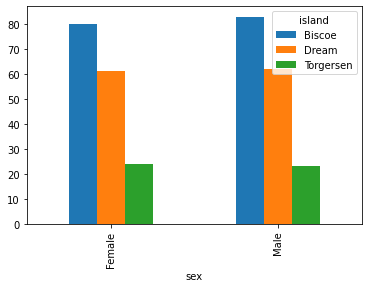

In [5]:
contingencyTable.plot(kind='bar')

In [6]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))